In [1]:
#PART 2
import numpy as np
from IPython.display import YouTubeVideo, display
from skimage import io
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from itertools import combinations
import pandas as pd
%matplotlib inline
from urllib.error import HTTPError


In [2]:
dfv=pd.read_csv("05-data-visualization-case-study-BernardoBelloC/data/USvideos.csv")

In [3]:
dfv

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [4]:
dfv.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


2kyS6SvSYSE


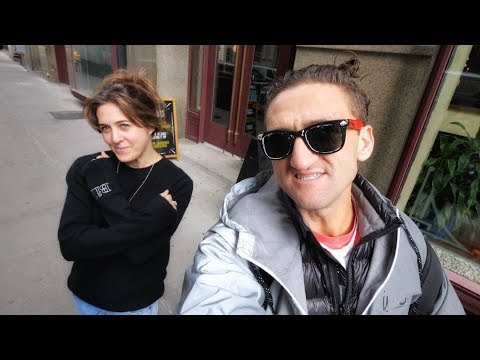

1ZAPwfrtAFY


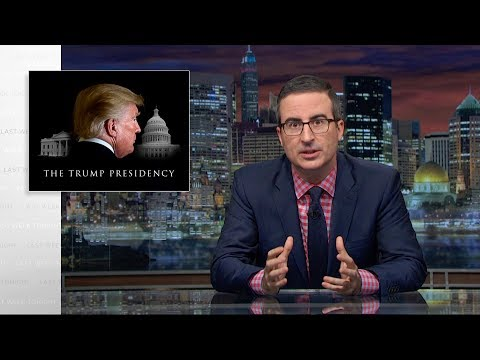

5qpjK5DgCt4


puqaWrEC7tY


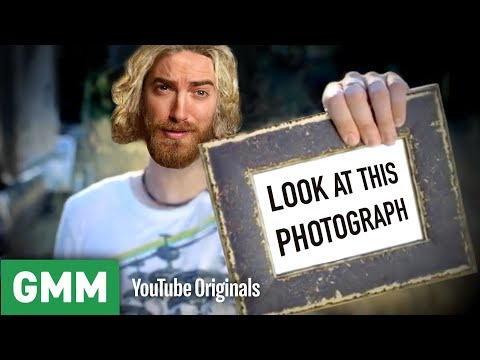

d380meD0W0M


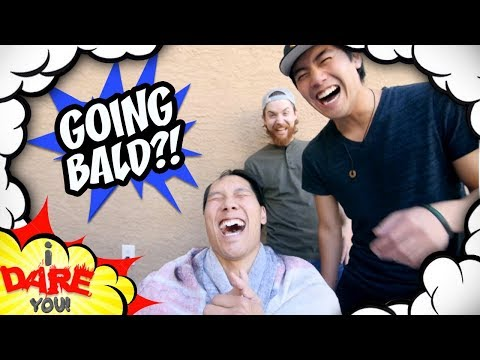

In [5]:
dfv5=dfv[0:5]
videos=dfv5['video_id']
for vid in videos:
    print(vid)
    v = YouTubeVideo(vid, width=500, height=300)
    display(v)

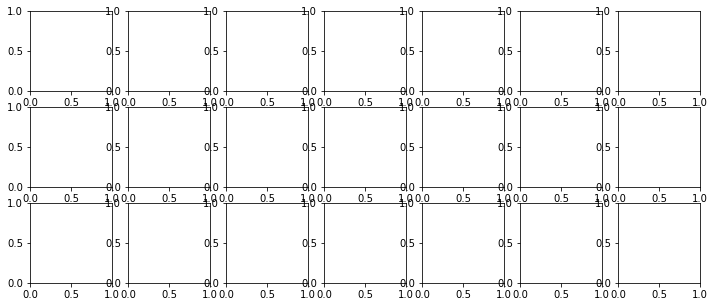

In [6]:
#PART 3 SHOWING 21 IMAGES
fig, axs=plt.subplots(3,7,figsize=(12,5))

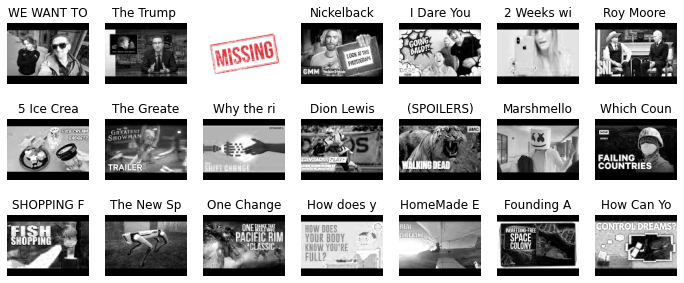

In [7]:
dfv21=dfv[:21]
imagenes=list(dfv21['thumbnail_link'])
fig, axs = plt.subplots(3,7, figsize=(12,5))
titles=list(dfv21['title'])
for ax, url, title in zip(axs.flatten(), imagenes, titles):
    try:
        ax.imshow(io.imread(url)[:,:,0],cmap='gray')
        ax.set_title(title[:10])
        ax.axis('off')
    except HTTPError:
        ax.imshow(io.imread('http://www.dagdrivarn.se/BILDER/stambilder/MISSING.jpg'))
        ax.axis('off')

In [8]:
#Part 4
dfv['tag_count']=dfv['tags'].apply(lambda x: x.count('|')+1 )
dfv

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,tag_count
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",4
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,23
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,27
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,14
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,1
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,24
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,22


In [9]:
#Part 5
dfv['Thumbs_up']=dfv.apply(lambda x: True if x.likes > x.dislikes else False, axis=1)
dfv

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,tag_count,Thumbs_up
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1,True
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",4,True
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,23,True
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,27,True
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,14,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,14,True
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,1,True
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,24,True
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,22,True


In [10]:
#Part 6
import json
with open('05-data-visualization-case-study-BernardoBelloC/data/US_category_id.json','r') as f:data=json.loads(f.read())

#Flatten data

us_cat=pd.json_normalize(data,record_path=['items'])
us_cat=us_cat[['id','snippet.title']]
us_cat['id']=us_cat['id'].apply(pd.to_numeric)
us_cat=us_cat.rename(columns={'id':'category_id','snippet.title':'category_title'})
us_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category_id     32 non-null     int64 
 1   category_title  32 non-null     object
dtypes: int64(1), object(1)
memory usage: 640.0+ bytes


In [12]:
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [15]:
#Part 7
dfv=dfv.merge(us_cat, how='inner', left_on='category_id',right_on='category_id')
dfv=dfv[['title','channel_title','category_title','views','likes','dislikes','comment_count','description','tag_count','Thumbs_up']]
dfv

,title,channel_title,category_title,views,likes,dislikes,comment_count,description,tag_count,Thumbs_up
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1,True
1,Me-O Cats Commercial,Nobrand,People & Blogs,98966,2486,184,532,Kittens come out of the eggs in a Thai commerc...,4,True
2,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,People & Blogs,321053,4451,1772,895,Subscribe for weekly videos ▶ http://bit.ly/sj...,44,True
3,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,People & Blogs,197062,7250,217,456,Molly is an god damn amazing human and she cha...,12,True
4,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,People & Blogs,2744430,115426,1110,6541,I found this online dollar store called ShopMi...,25,True
...,...,...,...,...,...,...,...,...,...,...
40944,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,Shows,1324482,22413,608,1644,"On an island full of Van Gundys, Stan gets tal...",33,True
40945,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,Shows,1332252,22461,610,1648,"On an island full of Van Gundys, Stan gets tal...",33,True
40946,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,Shows,1340039,22504,615,1648,"On an island full of Van Gundys, Stan gets tal...",33,True
40947,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,Shows,1345086,22542,615,1649,"On an island full of Van Gundys, Stan gets tal...",33,True


In [17]:
dfv=dfv[['title','channel_title','category_title','views','likes','dislikes','comment_count','description','tag_count','Thumbs_up']]
dfv

,title,channel_title,category_title,views,likes,dislikes,comment_count,description,tag_count,Thumbs_up
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1,True
1,Me-O Cats Commercial,Nobrand,People & Blogs,98966,2486,184,532,Kittens come out of the eggs in a Thai commerc...,4,True
2,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,People & Blogs,321053,4451,1772,895,Subscribe for weekly videos ▶ http://bit.ly/sj...,44,True
3,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,People & Blogs,197062,7250,217,456,Molly is an god damn amazing human and she cha...,12,True
4,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,People & Blogs,2744430,115426,1110,6541,I found this online dollar store called ShopMi...,25,True
...,...,...,...,...,...,...,...,...,...,...
40944,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,Shows,1324482,22413,608,1644,"On an island full of Van Gundys, Stan gets tal...",33,True
40945,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,Shows,1332252,22461,610,1648,"On an island full of Van Gundys, Stan gets tal...",33,True
40946,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,Shows,1340039,22504,615,1648,"On an island full of Van Gundys, Stan gets tal...",33,True
40947,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,Shows,1345086,22542,615,1649,"On an island full of Van Gundys, Stan gets tal...",33,True


In [20]:
#Part 8
prnt_dfv=dfv.nlargest(20,'views')
for n,m in enumerate(prnt_dfv.index):
    print(f'{n+1} : views: {prnt_dfv.views[m]} title: {prnt_dfv.title[m]} ')
    print('_'*80)

1 : views: 225211923 title: Childish Gambino - This Is America (Official Video) 
________________________________________________________________________________
2 : views: 220490543 title: Childish Gambino - This Is America (Official Video) 
________________________________________________________________________________
3 : views: 217750076 title: Childish Gambino - This Is America (Official Video) 
________________________________________________________________________________
4 : views: 210338856 title: Childish Gambino - This Is America (Official Video) 
________________________________________________________________________________
5 : views: 205643016 title: Childish Gambino - This Is America (Official Video) 
________________________________________________________________________________
6 : views: 200820941 title: Childish Gambino - This Is America (Official Video) 
________________________________________________________________________________
7 : views: 196222618 title: 

<AxesSubplot:ylabel='Frequency'>

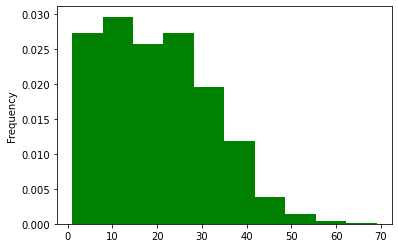

In [21]:
#Part 9
dfv['tag_count'].plot.hist(density=True,color='green')

<AxesSubplot:>

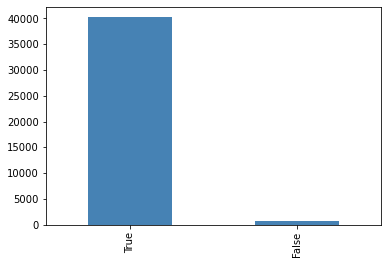

In [27]:
#Part 10
dfv['Thumbs_up'].value_counts().plot.bar(color='steelblue')



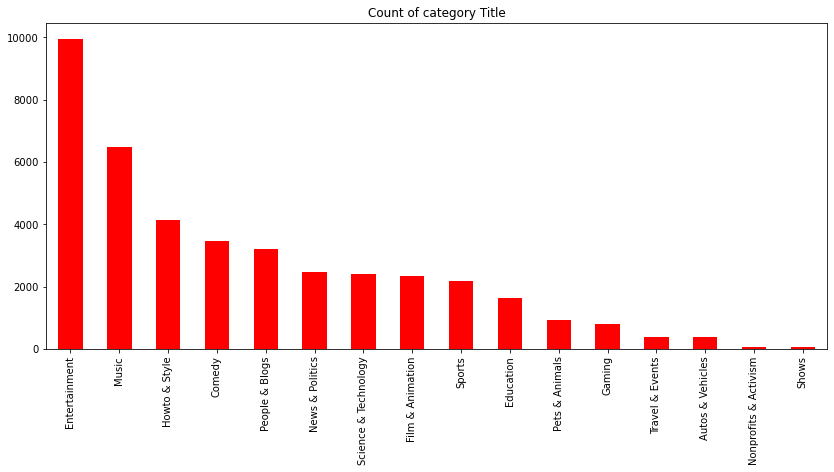

In [30]:
#Part 11
dfv['category_title'].value_counts(ascending=False).plot.bar(figsize=(14,6),color='red').set_title('Count of category Title');

(0.1, 100000000)

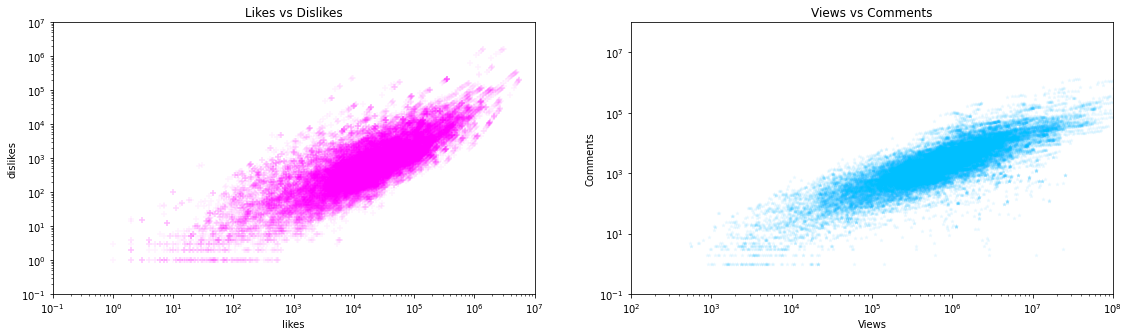

In [73]:
#Part 12
fig,axs =plt.subplots(1,2, figsize=(19,5))
axs[0].scatter(dfv['likes'],dfv['dislikes'], color="magenta", alpha=0.05, marker="+")
axs[0].set_title('Likes vs Dislikes')
axs[0].set_ylabel('dislikes')
axs[0].set_xlabel('likes')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlim(0.1,10000000)
axs[0].set_ylim(0.1,10000000)

axs[1].scatter(dfv['views'],dfv['comment_count'], color='deepskyblue',s=10, alpha=0.05, marker="*")
axs[1].set_title('Views vs Comments');
axs[1].set_ylabel('Comments')
axs[1].set_xlabel('Views')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlim(100,100000000)
axs[1].set_ylim(0.1,100000000)